# Task 4P: Daily and Monthly Mean Wind Speeds for Three Airports

## Shouvanik Sarkar, Student ID: 225174439, email id: s225174439@deakin.edu.au

### Daily and Monthly Mean Wind Speed for three airports

Based on hourly meteorological data for three airports in New York: LGA, JFK, and EWR for the whole year of 2013. We will be deep diving to see the daily and monthly changes in mean of wind speed. Check for Outliers if any. And also will be checking how the mean of the wind speed varies for the three airports. 

In [11]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
pd.set_option("display.notebook_repr_html", False)  # disable "rich" output
plt.style.use("seaborn")

After importing the required libraries. 
We will be loading the dataset into pandas dataframe and see the first 5 rows. 

In [12]:
file_path = r"D:\Study-Great Learning\Deakin\Data Wrangling\Tasks\data_files\nycflights13_weather\weather.csv"
print(os.path.exists(file_path))  # Should print True if the file exists
weather = pd.read_csv(file_path, delimiter=',', comment='#')
# Display the first few rows
print(weather.head())

True
  origin  year  month  day  hour   temp   dewp  humid  wind_dir  wind_speed  \
0    EWR  2013      1    1     0  37.04  21.92  53.97     230.0    10.35702   
1    EWR  2013      1    1     1  37.04  21.92  53.97     230.0    13.80936   
2    EWR  2013      1    1     2  37.94  21.92  52.09     230.0    12.65858   
3    EWR  2013      1    1     3  37.94  23.00  54.51     230.0    13.80936   
4    EWR  2013      1    1     4  37.94  24.08  57.04     240.0    14.96014   

   wind_gust  precip  pressure  visib            time_hour  
0  11.918651     0.0    1013.9   10.0  2013-01-01 01:00:00  
1  15.891535     0.0    1013.0   10.0  2013-01-01 02:00:00  
2  14.567241     0.0    1012.6   10.0  2013-01-01 03:00:00  
3  15.891535     0.0    1012.7   10.0  2013-01-01 04:00:00  
4  17.215830     0.0    1012.8   10.0  2013-01-01 05:00:00  


In [13]:
weather.describe().T

              count         mean         std      min          25%  \
year        26130.0  2013.000000    0.000000  2013.00  2013.000000   
month       26130.0     6.505741    3.440031     1.00     4.000000   
day         26130.0    15.679717    8.765022     1.00     8.000000   
hour        26130.0    11.518408    6.916581     0.00     6.000000   
temp        26129.0    55.203515   17.782124    10.94    39.920000   
dewp        26129.0    41.385399   19.371649    -9.94    26.060000   
humid       26129.0    62.347322   19.196078    12.74    46.990000   
wind_dir    25712.0   198.066661  107.841624     0.00   120.000000   
wind_speed  26127.0    10.395868    8.521200     0.00     6.904680   
wind_gust   26127.0    11.963357    9.806027     0.00     7.945768   
precip      26130.0     0.002726    0.019665     0.00     0.000000   
pressure    23400.0  1017.895175    7.422790   983.80  1012.900000   
visib       26130.0     9.204828    2.136306     0.00    10.000000   

                   

## Since the data in time_hour column are (incorrectly!) shifted by 1 hour. Lets correct the dataset by shifting it back by 1 hour.. 

In [14]:
print(weather['time_hour'])
weather['time_hour'] = pd.to_datetime(weather['time_hour'], format='%Y%m%d %H:%M:%S')
print(weather['time_hour'])

0        2013-01-01 01:00:00
1        2013-01-01 02:00:00
2        2013-01-01 03:00:00
3        2013-01-01 04:00:00
4        2013-01-01 05:00:00
                ...         
26125    2013-12-30 20:00:00
26126    2013-12-30 21:00:00
26127    2013-12-30 22:00:00
26128    2013-12-30 23:00:00
26129    2013-12-31 00:00:00
Name: time_hour, Length: 26130, dtype: object
0       2013-01-01 01:00:00
1       2013-01-01 02:00:00
2       2013-01-01 03:00:00
3       2013-01-01 04:00:00
4       2013-01-01 05:00:00
                ...        
26125   2013-12-30 20:00:00
26126   2013-12-30 21:00:00
26127   2013-12-30 22:00:00
26128   2013-12-30 23:00:00
26129   2013-12-31 00:00:00
Name: time_hour, Length: 26130, dtype: datetime64[ns]


In [15]:
weather['time_hour'] = weather['time_hour'] - pd.Timedelta(hours=1)
weather.head()

  origin  year  month  day  hour   temp   dewp  humid  wind_dir  wind_speed  \
0    EWR  2013      1    1     0  37.04  21.92  53.97     230.0    10.35702   
1    EWR  2013      1    1     1  37.04  21.92  53.97     230.0    13.80936   
2    EWR  2013      1    1     2  37.94  21.92  52.09     230.0    12.65858   
3    EWR  2013      1    1     3  37.94  23.00  54.51     230.0    13.80936   
4    EWR  2013      1    1     4  37.94  24.08  57.04     240.0    14.96014   

   wind_gust  precip  pressure  visib           time_hour  
0  11.918651     0.0    1013.9   10.0 2013-01-01 00:00:00  
1  15.891535     0.0    1013.0   10.0 2013-01-01 01:00:00  
2  14.567241     0.0    1012.6   10.0 2013-01-01 02:00:00  
3  15.891535     0.0    1012.7   10.0 2013-01-01 03:00:00  
4  17.215830     0.0    1012.8   10.0 2013-01-01 04:00:00  

### We will convert all the columns so that they use metric (International System of Units, SI) or derived units:
For instance:
- temp and dewp to Celsius, 
- precip to millimetres, 
- visib to metres, 
- wind_speed and wind_gust to metres per second. 
We will Replace the data in-place (overwrite existing columns with new ones).

In [16]:
# Convert Fahrenheit to Celsius
weather['temp'] = (weather['temp'] - 32) / 1.8
weather['dewp'] = (weather['dewp'] - 32) / 1.8
weather['precip'] = weather['precip'] *25.4
weather['visib'] = weather['visib'] * 1609.34
weather['wind_speed'] = weather['wind_speed'] * 0.44704
weather['wind_gust'] = weather['wind_gust'] * 0.44704
#updated weather
print(weather.head(5))

  origin  year  month  day  hour  temp  dewp  humid  wind_dir  wind_speed  \
0    EWR  2013      1    1     0   2.8  -5.6  53.97     230.0    4.630002   
1    EWR  2013      1    1     1   2.8  -5.6  53.97     230.0    6.173336   
2    EWR  2013      1    1     2   3.3  -5.6  52.09     230.0    5.658892   
3    EWR  2013      1    1     3   3.3  -5.0  54.51     230.0    6.173336   
4    EWR  2013      1    1     4   3.3  -4.4  57.04     240.0    6.687781   

   wind_gust  precip  pressure    visib           time_hour  
0   5.328114     0.0    1013.9  16093.4 2013-01-01 00:00:00  
1   7.104152     0.0    1013.0  16093.4 2013-01-01 01:00:00  
2   6.512139     0.0    1012.6  16093.4 2013-01-01 02:00:00  
3   7.104152     0.0    1012.7  16093.4 2013-01-01 03:00:00  
4   7.696165     0.0    1012.8  16093.4 2013-01-01 04:00:00  


### Daily Mean Wind Speed
Now Lets compute the daily mean wind speed for New York airport- LGA

In [17]:
daily_mean_wind_speed = (
    weather[weather.origin=='LGA']
    .groupby(["year","month","day"])['wind_speed']  # Group by date (year, month, day)
    .mean()
    .reset_index(name='daily_mean_wind_speed')        # Reset index
)

In [18]:
# Display first 5 rows
print(daily_mean_wind_speed.head(5))

   year  month  day  daily_mean_wind_speed
0  2013      1    1               6.687781
1  2013      1    2               6.430559
2  2013      1    3               4.908660
3  2013      1    4               6.880698
4  2013      1    5               5.144447


Combining the date field by adding year, month and day together.

In [19]:
daily_mean_wind_speed['date'] = pd.to_datetime(daily_mean_wind_speed[['year', 'month', 'day']])

Now Lets plot the Daily Mean Wind Speeds at LGA airport(in New York) for year 2013 on a daily basis. 

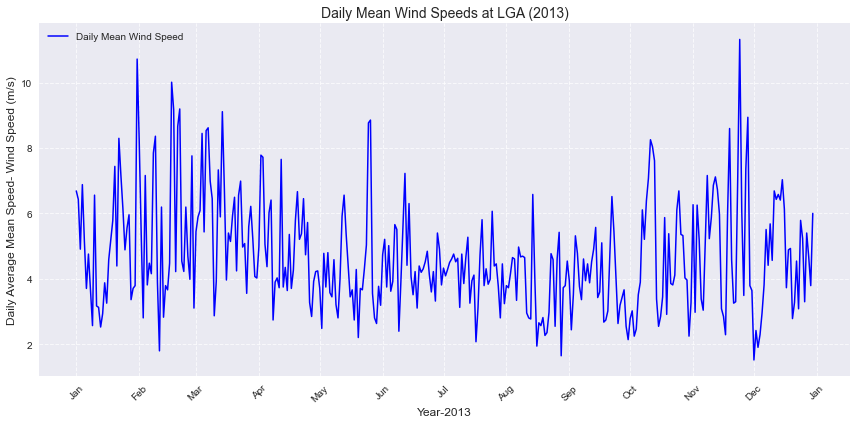

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(daily_mean_wind_speed['date'], daily_mean_wind_speed['daily_mean_wind_speed'], 
         label='Daily Mean Wind Speed', color='blue', linewidth=1.5)

# Formatting the plot
plt.title('Daily Mean Wind Speeds at LGA (2013)', fontsize=14)
plt.xlabel('Year-2013', fontsize=12)
plt.ylabel('Daily Average Mean Speed- Wind Speed (m/s)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Set x-axis to display month names
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())
plt.xticks(rotation=45, fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

Also, lets display the top 10 windiest days for the LGA Airport in 2013

In [21]:
top_10_windiest_days = (
    daily_mean_wind_speed
    .sort_values(by='daily_mean_wind_speed', ascending=False)  # Sort by wind speed
    .head(10) # Take the top 10 rows
    .reset_index(drop= True)
)
top_10_windiest_days['daily_mean_wind_speed'] = round(top_10_windiest_days['daily_mean_wind_speed'],2)
# Select only the 'date' and 'daily_mean_wind_speed' columns
top_10_windiest_days = top_10_windiest_days[['date', 'daily_mean_wind_speed']]

# Display the result
print(top_10_windiest_days)

        date  daily_mean_wind_speed
0 2013-11-24                  11.32
1 2013-01-31                  10.72
2 2013-02-17                  10.01
3 2013-02-21                   9.19
4 2013-02-18                   9.17
5 2013-03-14                   9.11
6 2013-11-28                   8.94
7 2013-05-26                   8.85
8 2013-05-25                   8.77
9 2013-02-20                   8.66


We can see It was windiest on 21th Nove 2013 followed by 31 Jan 2013 and so on and so forth

### Lets create a box plot for the wind speed column to see if there lies any outliers compared to other data points. 

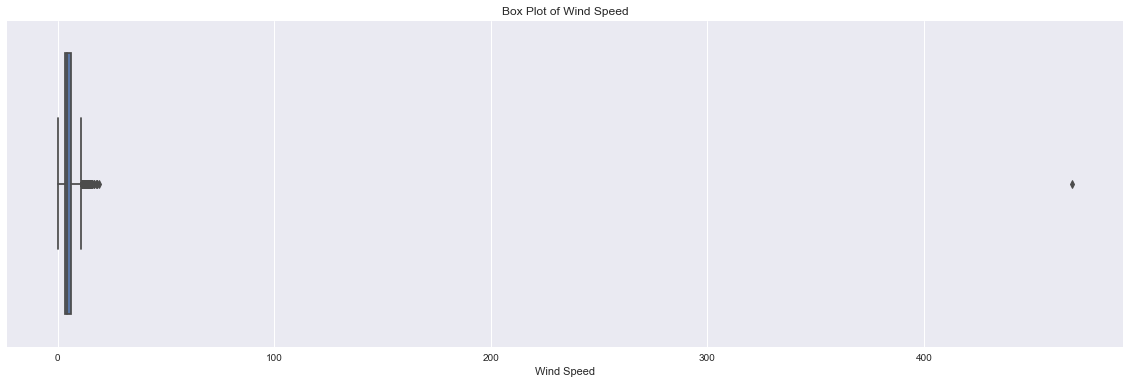

In [22]:
# Create a box plot for the 'wind_speed' column
plt.figure(figsize=(20, 6))
sns.boxplot(data=weather, x='wind_speed')

# Customize the plot
plt.title('Box Plot of Wind Speed')
plt.xlabel('Wind Speed')
plt.show()


We can see one record specifically, which lies at speed of ~450-500 metres per second. These can be or might be a wrong data point or wrong value present in the data set. We will identify the location of this records and will replace it with null. Else this will change multiple aggreagte values. 


In [23]:
#Calculate the IQR for wind_speed
Q1 = weather['wind_speed'].quantile(0.25)  # First quartile (25%)
Q3 = weather['wind_speed'].quantile(0.75)  # Third quartile (75%)
IQR = Q3 - Q1  # Interquartile range

#Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Identify outliers beyond the bounds
outlier_indices = weather[(weather['wind_speed'] < lower_bound) | (weather['wind_speed'] > upper_bound)].index

# Find the most extreme outlier (highest absolute value)
extreme_outlier_index = outlier_indices[np.argmax(np.abs(weather.loc[outlier_indices, 'wind_speed']))]

print(extreme_outlier_index)
#Replace with nan
weather.loc[extreme_outlier_index, 'wind_speed'] = np.nan

1015


Here we are replacing the maximum outlier index with nan value, as we saw from previous box plot, this was a wrong data. 
Lets plot the box plot again to see how the plot looks. 

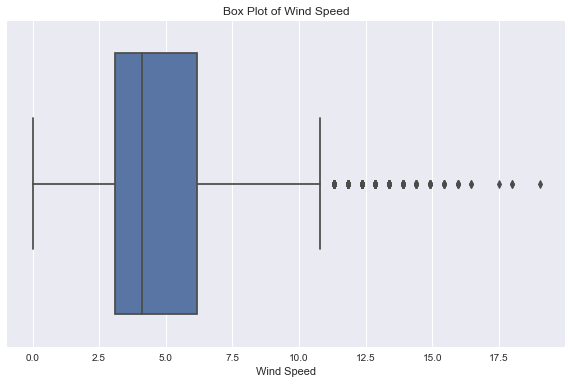

In [24]:
# Re-Create a box plot for the 'wind_speed' column, to check for the extreme outlier
plt.figure(figsize=(10, 6))
sns.boxplot(data=weather, x='wind_speed')

# Customize the plot
plt.title('Box Plot of Wind Speed')
plt.xlabel('Wind Speed')
plt.show()

The other records, though they are outliers but should be valid values as we might have such speeds of wind. So we will not be replacing this values and will go ahead with next steps of analysis. 

### Now lets analyse the monthly means of the wind speed based on the various New York airports 

In [25]:
monthly_mean_wind_speeds = (
    weather#[weather.origin=='LGA']
    .groupby(["year","month","origin"])['wind_speed']  # Group by date (year, month, day)
    .mean()
    .reset_index(name='monthly_mean_wind_speeds')        # Reset index for a clean DataFrame
)

In [26]:
monthly_mean_wind_speeds.head(5)

   year  month origin  monthly_mean_wind_speeds
0  2013      1    EWR                  4.328121
1  2013      1    JFK                  5.378474
2  2013      1    LGA                  5.068977
3  2013      2    EWR                  4.731659
4  2013      2    JFK                  5.954831

### The monthly mean wind speeds for the three airports
Now lets plot the monthly mean wind speeds for the three airports and see if we have any valuable insights which can be checked. 

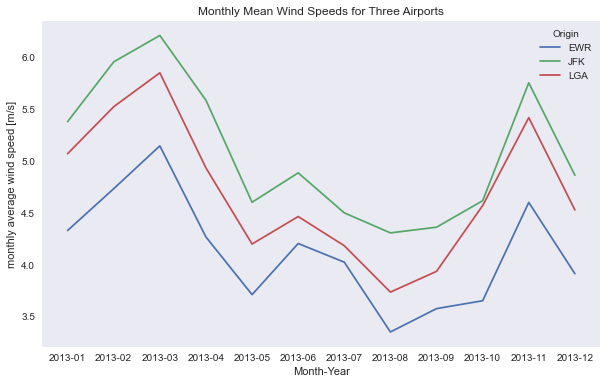

In [27]:
monthly_mean_wind_speeds['Year-Mon'] = monthly_mean_wind_speeds['year'].astype(str) + '-'\
                                       + monthly_mean_wind_speeds['month'].astype(str).str.zfill(2)

# Plot the data
plt.figure(figsize=(10, 6))

# Plot each airport's monthly mean wind speed
for i in monthly_mean_wind_speeds['origin'].unique():
    origin_data = monthly_mean_wind_speeds[monthly_mean_wind_speeds['origin'] == i]
    plt.plot(origin_data['Year-Mon'], origin_data['monthly_mean_wind_speeds'], label=i)

# Adding labels and title
plt.xlabel('Month-Year')
plt.ylabel('monthly average wind speed [m/s]')
plt.title('Monthly Mean Wind Speeds for Three Airports')
plt.legend(title='Origin')

# Show the plot
plt.grid(False)
plt.show()

### Inference
- 1. The monthly mean wind speeds of high and low went similar trends for all the airports. 
   - January started at low, kept increasing till March and went down drastically till May, and wind speeds picked up again in June, came down for August and stayed low until November when it increased drastically. and came down again in December. 
   - The above trend followed similar pattern for all the airports. 
   - Though, there is a difference in wind speeds for each of the airports when compared to each other. 
- 2. We can clearly, see from the above plot there are quite a difference between the various airports in terms of wind speeds on a daily/monthly basis. 
- 3. We can see and depict, Airport JFK in New York is most windy compared to EWR and LGA through-out the year and similarly, LGA is more windy compared to EWR through out the year. 
- 4. Though the monthly average wind speed reached maximum of more than 6m/s for JFK, for LGA, it peaked maximum at ~5.75 m/s and for EWR, it peaked maximum at ~5 m/s. 
   - Monthly mean Wind Speeds peaked in the month of March 
   - Monthly mean Wind Speeds was lowest for month of August.
   - There was sudden increase in in mean of wind speeds for all the three airports for month of November. 